# Assignment 06

In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data analysis

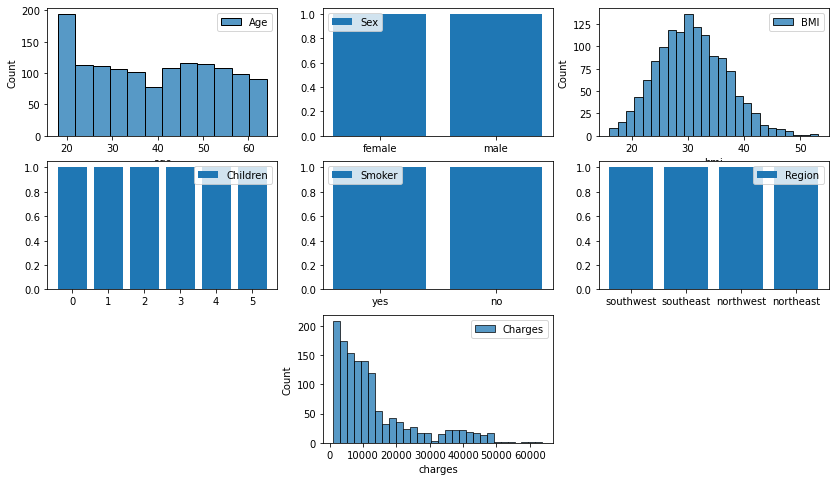

In [6]:
plt.figure(figsize=(14,8))
plt.subplot(3,3,1)
sns.histplot(df['age'],label='Age')
plt.legend()

plt.subplot(3,3,2)
plt.bar(df['sex'],1,label='Sex')
plt.legend()

plt.subplot(3,3,3)
sns.histplot(df['bmi'],label='BMI')
plt.legend()

plt.subplot(3,3,4)
plt.bar(df['children'],1,label='Children')
plt.legend()

plt.subplot(3,3,5)
plt.bar(df['smoker'],1,label='Smoker')
plt.legend()

plt.subplot(3,3,6)
plt.bar(df['region'],1,label='Region')
plt.legend()

plt.subplot(3,3,8)
sns.histplot(df['charges'],label='Charges')
plt.legend()


plt.show()

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

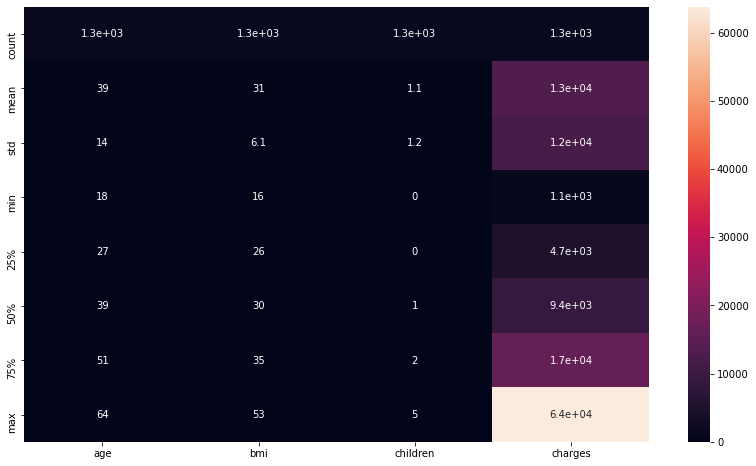

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(df.describe(),annot=True,data=df)

<AxesSubplot:>

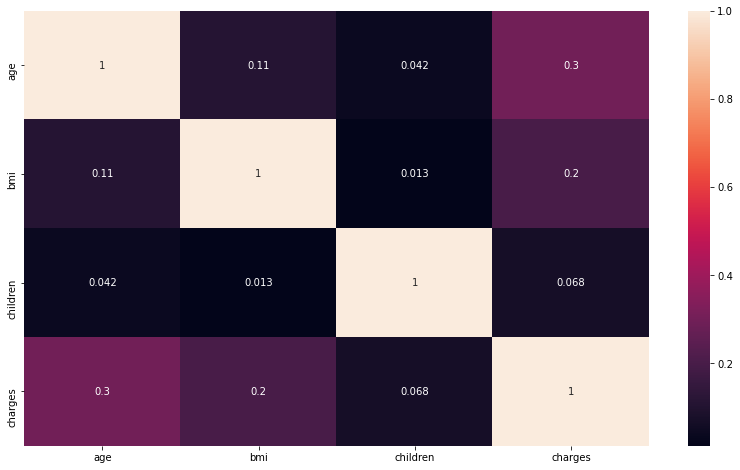

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,data=df)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ee92144f40>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ee92136190>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ee921442b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ee92136730>}

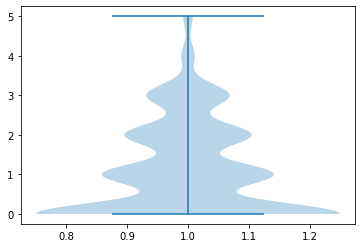

In [10]:
plt.violinplot(df['children'])

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

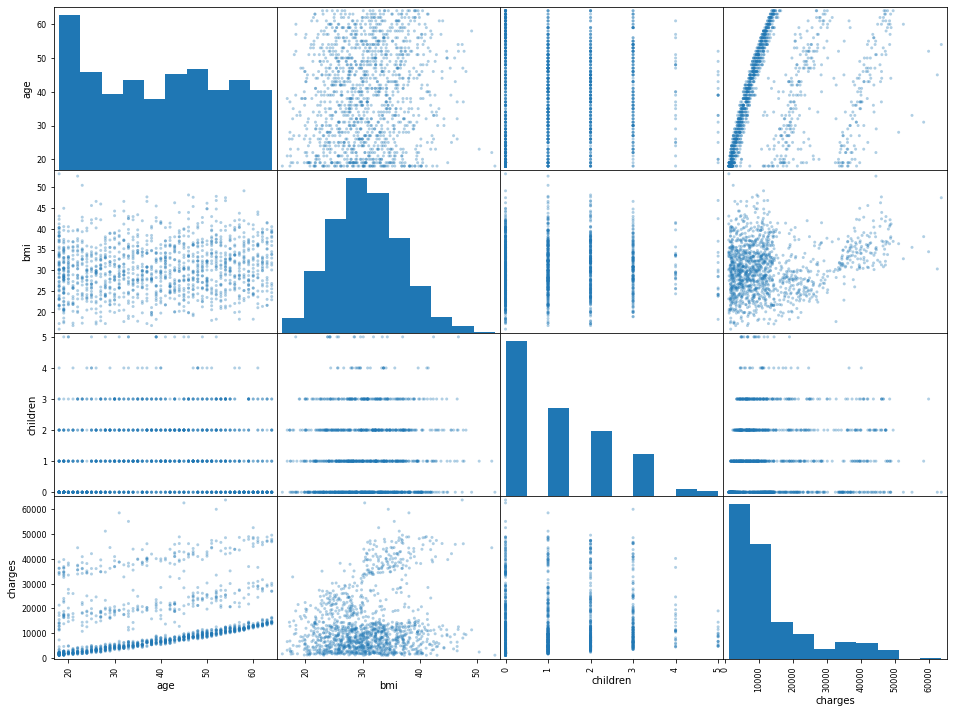

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(16,12),alpha=.35)

# Encoding

In [12]:
cols = ['sex','smoker','region']
for col in cols:
    one = pd.get_dummies(df[col])
    df = pd.concat([df, one], axis=1).drop(col, axis=1)

In [13]:
df.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Split data into train and test

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
x=df.drop(['charges'],axis=1)
x.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [16]:
y=df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

# Linear Regressoin with multiple variable

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

In [21]:
m = reg.coef_
m

array([   255.7212315 ,    351.00654269,    434.27456229,    205.26290743,
         -205.26290743, -11844.65685072,  11844.65685072,    620.86910383,
          165.23459969,   -472.67787487,   -313.42582865])

In [22]:
c = reg.intercept_
c 

-904.0592447887811

In [23]:
ypred_reg=reg.predict(xtest)
ypred_reg

array([ 1.28919805e+04,  1.07266673e+04,  9.66758741e+03,  1.04454422e+04,
        1.83961467e+03,  3.33544488e+04, -1.28326862e+03,  7.78320412e+03,
        1.40953602e+04,  1.03652277e+04,  3.49687311e+04,  5.05189088e+03,
        4.01933124e+04,  1.33914312e+04,  6.02693399e+03,  3.42036254e+04,
        1.24025316e+04,  6.96368378e+03,  1.21253439e+04,  3.29589857e+04,
        1.44155666e+04,  3.39512684e+02,  1.08203173e+04,  1.15686545e+04,
        3.04055562e+04,  3.16015606e+04,  1.43260027e+04,  1.08345782e+03,
        1.36701868e+04,  5.49507026e+03,  4.41475145e+03,  1.14371115e+04,
        1.75820262e+04,  2.87537336e+03,  7.35499041e+03,  6.66484589e+03,
        1.16355601e+04,  2.70966236e+04,  1.49473916e+04,  3.96603015e+03,
        6.40100290e+03,  4.28854181e+03,  1.37027743e+04,  1.48412673e+04,
        7.67509844e+03,  1.82126222e+04,  8.95823621e+03,  3.07627966e+04,
       -2.12806331e+03,  3.15537764e+04,  2.85107986e+03,  3.22583260e+04,
        1.27801628e+04,  

# KNN Regression

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
knn = KNeighborsRegressor(n_neighbors=50)

In [26]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=50)

In [27]:
ypred_knn=knn.predict(xtest)
ypred_knn

array([15345.5010838 , 12257.9719484 , 11406.3123586 , 14828.2245452 ,
        6036.8296982 , 14611.5828888 ,  5892.9708226 , 13967.6840288 ,
       18163.5500916 , 14367.5141314 , 16581.8279436 , 10514.7794134 ,
       19990.8504772 , 17133.1953456 , 12338.950371  , 15702.4029058 ,
       17006.0874222 ,  9322.2967286 , 16039.9597316 , 15631.271448  ,
       22814.4667878 ,  5031.4823318 , 15514.7362116 , 17686.5858348 ,
       14555.2496512 , 12483.1906726 , 17679.7631694 ,  7332.9956654 ,
       15332.7622456 ,  8549.585661  , 11550.8004044 , 13620.0152406 ,
       20066.6893994 ,  9672.32425898, 14219.2399472 , 12987.9257562 ,
       12931.4768776 ,  9193.97573578, 22386.8899664 , 11191.9716976 ,
        8866.2183106 ,  8292.6843992 , 17529.9114444 , 21143.3444202 ,
       11268.7993726 , 18427.1647798 , 12004.3774376 , 11458.6304288 ,
        6133.7119066 , 17218.057659  ,  8902.9110064 , 16906.61318   ,
       15642.2950664 , 18346.0826174 ,  7948.783694  , 13583.6415264 ,
      

# Model evaluation

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
from sklearn.metrics import r2_score
print("Linear regression Accuracy:",r2_score(ytest, ypred_reg))
print("KNN regression Accuracy:",r2_score(ytest, ypred_knn))

Linear regression Accuracy: 0.7915889467344828
KNN regression Accuracy: 0.1874426361722601


# Improving KNN score

In [54]:
training_accuraacy=[]
testing_accuracy=[]

neighbors=range(1,50)

for number_of_neighbors in neighbors:
    KNN=KNeighborsRegressor(n_neighbors=number_of_neighbors)
    KNN.fit(xtrain,ytrain)
    training_accuraacy.append(KNN.score(xtrain,ytrain))
    testing_accuracy.append(KNN.score(xtest,ytest))

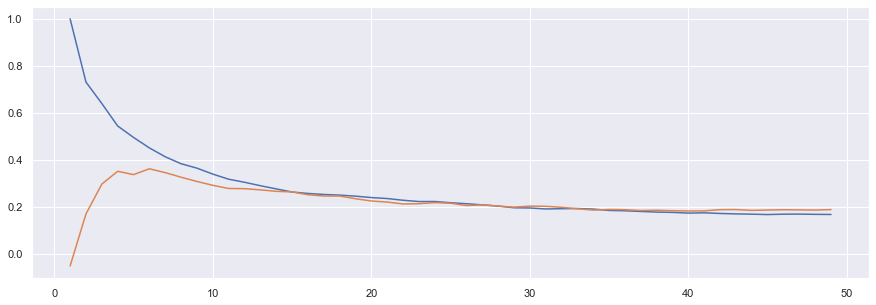

In [55]:
plt.plot(neighbors,training_accuraacy,label='Trining accuracy')
plt.plot(neighbors,testing_accuracy,label='Trining accuracy')

In [57]:
training_accuraacy=[]
testing_accuracy=[]

neighbors=range(1,20)

for number_of_neighbors in neighbors:
    KNN=KNeighborsRegressor(n_neighbors=number_of_neighbors)
    KNN.fit(xtrain,ytrain)
    training_accuraacy.append(KNN.score(xtrain,ytrain))
    testing_accuracy.append(KNN.score(xtest,ytest))

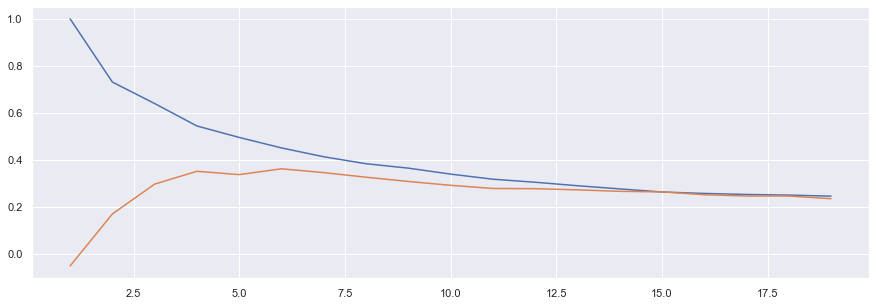

In [58]:
plt.plot(neighbors,training_accuraacy,label='Trining accuracy')
plt.plot(neighbors,testing_accuracy,label='Trining accuracy')

In [59]:
Knn = KNeighborsRegressor(n_neighbors=15)

In [60]:
Knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=15)

In [61]:
ypred_Knn=Knn.predict(xtest)
ypred_Knn

array([13416.55130867, 12742.02343467, 12170.25866   , 14080.21661067,
        8543.41160667, 13778.64724333,  4640.63316867, 15362.03202533,
       16646.745312  , 15131.479008  , 18257.703534  ,  8658.02896133,
       21660.59306867, 18080.158918  , 11135.138174  , 14130.317064  ,
       14541.04798733,  7950.4198    , 13943.57866467, 15944.675992  ,
       22633.21905667,  4312.56328333, 13494.19111067, 12093.88824667,
       23305.522304  , 12174.27449133, 16776.98722267,  8478.817794  ,
       14993.11221933,  8294.02460267,  8223.69118667, 13433.19995867,
       14375.67319333,  8407.302542  , 11721.05397   ,  6520.42404533,
       14721.08047933, 16095.94514867, 22814.936866  , 10301.81747   ,
       11046.18565533,  8140.94767333, 21652.26676467, 24536.277664  ,
        8131.803912  , 21763.08275733, 10688.61197667,  8533.78443   ,
        5712.58847267, 15881.52158333,  5421.87090467, 17589.859022  ,
       12911.95944933, 19324.78438067,  9119.00916667, 16809.31748467,
      

# KNN accuracy after updating neighbors value

In [62]:
print("KNN regression Accuracy:",r2_score(ytest, ypred_Knn))

KNN regression Accuracy: 0.26247778919003817


# Compare Between Model

In [63]:
acu_vis={
    'algorithm':['Linear Regression','KNN Regression'],
    'accuracy':[ 0.7915889467344828,0.1874426361722601]
}

In [64]:
accuracy_df=pd.DataFrame(acu_vis)
accuracy_df

,algorithm,accuracy
0,Linear Regression,0.791589
1,KNN Regression,0.187443


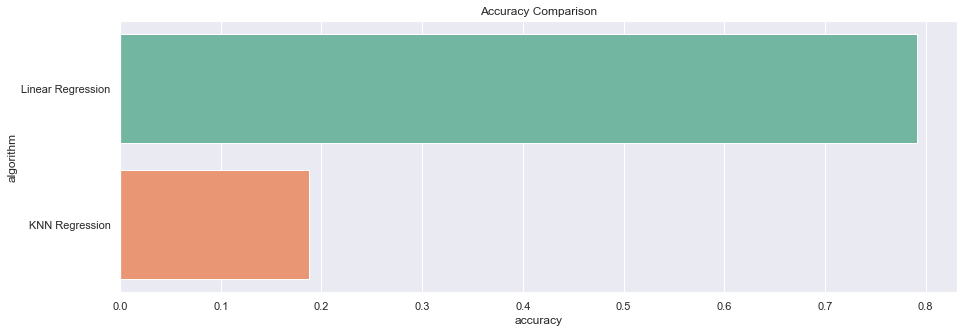

In [65]:
sns.set()
plt.title('Accuracy Comparison')
sns.barplot(y="algorithm",x='accuracy',data=accuracy_df,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})

# Comparison after Updating value of neighbors

In [68]:
acu_vis2={
    'algorithm':['Linear Regression','KNN Regression'],
    'accuracy':[ 0.7915889467344828,0.26247778919003817]
}

In [70]:
accuracy_df2=pd.DataFrame(acu_vis2)
accuracy_df2

,algorithm,accuracy
0,Linear Regression,0.791589
1,KNN Regression,0.262478


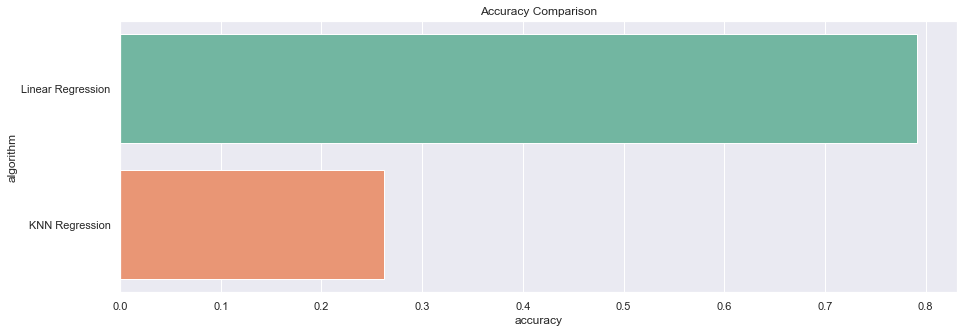

In [71]:
sns.set()
plt.title('Accuracy Comparison')
sns.barplot(y="algorithm",x='accuracy',data=accuracy_df2,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})